Assignment 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Image Augmentation

In [ ]:
data_path = '/content/drive/MyDrive/CNN/flowers'
batch_size = 32
target_size = (64, 64)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode = 'categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical') 

Found 3465 images belonging to 5 classes.
Found 862 images belonging to 5 classes.


Create Model

In [ ]:
model = Sequential()

ADD layers

In [ ]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [ ]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 341s 3s/step - loss: 1.4114 - accuracy: 0.3541
Epoch 2/20
100/100 [==============================] - 53s 530ms/step - loss: 1.1689 - accuracy: 0.5222
Epoch 3/20
100/100 [==============================] - 33s 327ms/step - loss: 1.0771 - accuracy: 0.5650
Epoch 4/20
100/100 [==============================] - 30s 296ms/step - loss: 1.0278 - accuracy: 0.5877
Epoch 5/20
100/100 [==============================] - 31s 308ms/step - loss: 0.9545 - accuracy: 0.6327
Epoch 6/20
100/100 [==============================] - 30s 298ms/step - loss: 0.9066 - accuracy: 0.6522
Epoch 7/20
100/100 [==============================] - 31s 308ms/step - loss: 0.8570 - accuracy: 0.6689
Epoch 8/20
100/100 [==============================] - 30s 297ms/step - loss: 0.8410 - accuracy: 0.6775
Epoch 9/20
100/100 [==============================] - 31s 306ms/step - loss: 0.8070 - accuracy: 0.6896
Epoch 10/20
100/100 [==============================] - 31s 309ms/step - los

Save the model

In [ ]:
model.save("model.h5")

Test the model

In [ ]:
def predict():
    img = image.load_img("/content/drive/MyDrive/CNN/flowers/rose/118974357_0faa23cce9_n.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/CNN/flowers/rose/118974357_0faa23cce9_n.jpg"))
    plt.axis('off')
    plt.show()

The given image is a rose


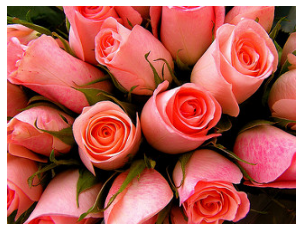

In [ ]:
predict()